In [1]:
from src.utils import get_mapping_dict, inv_normalize
from src.dataset import ImageNetteDataset
from src.model import get_model
from src.attack import Attacker
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mapping_folder_to_name, mapping_folder_to_label, mapping_name_to_label, mapping_label_to_name = get_mapping_dict()

val_dataset = ImageNetteDataset(data_root="./data/imagenette2/val", mapping_folder_to_label=mapping_folder_to_label, train=True)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

model = get_model("resnet18")
model.load_state_dict(torch.load("./models/resnet18.pth"))
criterion = nn.CrossEntropyLoss()

In [3]:
target = 3
print(f"target = {mapping_label_to_name[target]}")

model.to("cuda")
model.eval()
for idx, (data, labels) in enumerate(val_dataloader):
    
    # original prediction
    out = model(data.to("cuda"))
    _, preds = torch.max(out, 1)
    print(f"original prediction = {mapping_label_to_name[int(preds.cpu()[0])]}")
    
    # generate adversarial example
    attacker = Attacker(model=model, data=data, target=torch.Tensor([target]).long(), criterion=criterion)
    perturbed_data = attacker.attack(epsilon=0.1, alpha=0.01, attack_type = "PGD", PGD_round=40)
    out = model(perturbed_data.to("cuda"))
    _, preds = torch.max(out, 1)
    preds = int(preds.cpu()[0])
    print(f"adversarial prediction = {mapping_label_to_name[(preds)]}")
    
    # check if the attack is success
    print("Success") if (preds == target) else print("Fail")
        
    break

target = chain_saw
original prediction = gas_pump
adversarial prediction = chain_saw
Success


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


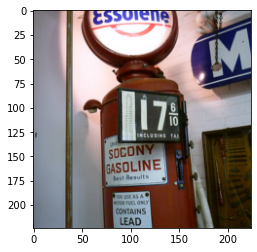

In [4]:
plt.imshow(inv_normalize(torch.squeeze(data, 0)).permute(1,2,0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


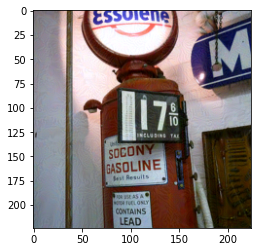

In [5]:
plt.imshow(inv_normalize(torch.squeeze(perturbed_data.cpu(), 0)).permute(1,2,0))
plt.show()